In [5]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('C:/Users/nickk/OneDrive/Desktop/TPU/ProgrammingPython/diabetes_coursework/diabetes_binary_health_indicators_BRFSS2015.csv')
# Выбор признаков и целевой переменной
Selected_features = ['GenHlth' ,'CholCheck' ,'HighBP' ,'AnyHealthcare' ,'PhysActivity' ,'BMI' ,
'HighChol' ,'Age' ,'Fruits' ,'Income' ,'DiffWalk' ,'Education' ,'HeartDiseaseorAttack'
,'PhysHlth' , 'Smoker']
Target = 'Diabetes'

X = df[Selected_features]
y = df[Target]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Масштабирование признаков
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2)

# Определение моделей 
cat  = CatBoostClassifier(verbose=0)
lgb = LGBMClassifier(verbose = -1)
xgb = XGBClassifier()

# Определение моделей в VotingClassifier
model = [('cat', cat), ('lgb', lgb), ('xgb', xgb)]
clf = VotingClassifier(model , voting='soft' , n_jobs = -1)

# Обучение модели
clf.fit(X_train , y_train)


VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001AF7D76FFE0>),
                             ('lgb', LGBMClassifier(verbose=-1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feat...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 n_jobs=-1, voting='soft')

In [3]:
y_probs = clf.predict_proba(X_test)

# The Area Under the Precision-Recall Curve (AUPRC) is used to evaluate the performance of a binary classification model, especially when dealing with imbalanced datasets// Площадь под кривой точности-отзыва (AUPRC) используется для оценки эффективности модели бинарной классификации, особенно при работе с несбалансированными наборами данных

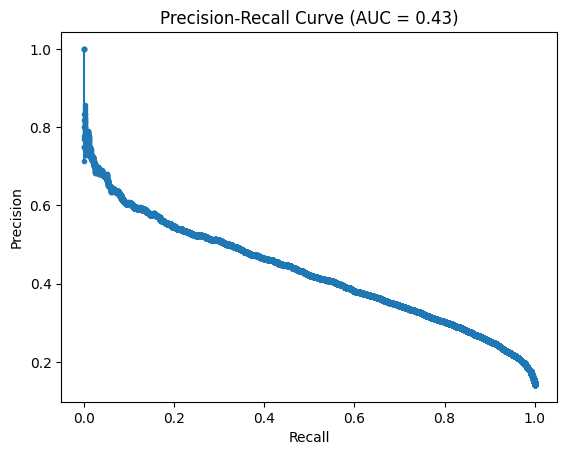

In [8]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Получение предсказаний
y_probs = clf.predict_proba(X_test)
y_probs_positive_class = y_probs[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_probs_positive_class)

auprc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AUC = {auprc:.2f})')
plt.show()

# Матрица ошибок (Confusion Matrix)
Матрица ошибок показывает, сколько предсказаний было правильными и неправильными для каждого класса.

<Figure size 800x600 with 0 Axes>

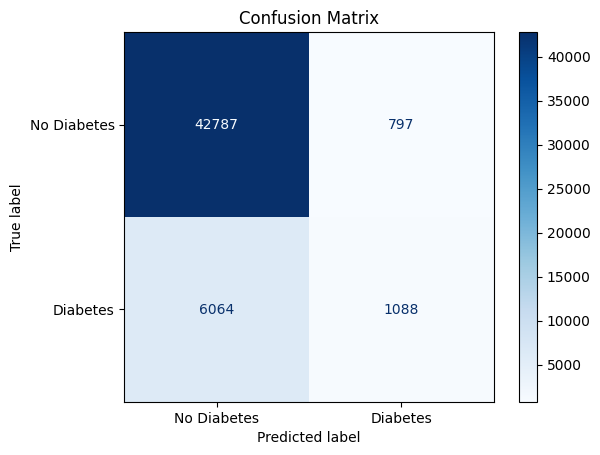

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43584
         1.0       0.58      0.15      0.24      7152

    accuracy                           0.86     50736
   macro avg       0.73      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736

        True Values  Predictions
144305          0.0          0.0
86558           1.0          1.0
100490          0.0          0.0
48569           0.0          0.0
42095           0.0          0.0
127649          0.0          0.0
182807          0.0          0.0
243349          1.0          0.0
235462          0.0          0.0
136813          0.0          0.0


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Получение предсказаний
y_pred = clf.predict(X_test)

# Функция для визуализации матрицы ошибок
def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Функция для визуализации матрицы ошибок.
    
    :param y_true: Истинные значения
    :param y_pred: Предсказанные значения
    :param class_names: Названия классов
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Визуализация матрицы ошибок
class_names = ['No Diabetes', 'Diabetes']
plot_confusion_matrix(y_test, y_pred, class_names)

# Вывод отчета о классификации
print(classification_report(y_test, y_pred))

# Вывод предсказаний
results_df = pd.DataFrame({
    'True Values': y_test,
    'Predictions': y_pred
})

# Показать первые 10 строк
print(results_df.head(10))


**Матрица предсказаний** (confusion matrix) показывает, как ваш классификатор справляется с задачей предсказания. Рассмотрим ее элементы:

True Negatives (TN): 42787 - количество правильно классифицированных случаев без диабета. 
False Positives (FP): 797 - модель ошибочно предсказала наличие диабета, хотя его нет.
False Negatives (FN): 6064 - количество случаев, когда модель не распознала диабет, хотя он есть.
True Positives (TP): 1088 - количество правильно классифицированных случаев с диабетом. 
В приведенной матрице ошибок числа обозначают следующее:

Из этих данных можно вычислить несколько метрик:
Accuracy: (TP + TN) / (TP + TN + FP + FN)
Precision: TP / (TP + FP)
Recall: TP / (TP + FN)
F1-Score: 2 * (Precision * Recall) / (Precision + Recall)


**Отчет о классификации**:

Precision (Точность): Это доля правильных положительных предсказаний от всех предсказанных положительных (True Positives / (True Positives + False Positives)). Для класса 0.0 точность 0.88, что означает, что 88% предсказаний класса 0.0 были верными. Для класса 1.0 точность 0.58 — это хуже, указывает на большее количество неправильных предсказаний.

Recall (Полнота): Это доля правильных положительных предсказаний от всех истинных положительных (True Positives / (True Positives + False Negatives)). Для класса 0.0 полнота 0.98, что означает, что модель хорошо находит истинные положительные примеры. Для класса 1.0 полнота 0.15, что указывает на то, что модель пропускает много примеров этого класса.

F1-score: Это среднее гармоническое между точностью и полнотой. Он учитывает как ложные положительные, так и ложные отрицательные. Для класса 0.0 F1-score 0.93 — это высокий показатель. Для класса 1.0 F1-score 0.24 — это низкий показатель.

Support: Это количество истинных примеров для каждого класса в тестовом наборе. Класс 0.0 имеет 43,584 примеров, а класс 1.0 — только 7,152.

Accuracy (Точность): Это доля правильных предсказаний от общего числа предсказаний. В вашем случае 0.86 (86%).

Macro Avg**: Средние значения по всем классам, не взвешенные по количеству примеров. Указывает на общую производительность модели без учета дисбаланса классов.

Weighted Avg: Средние значения по всем классам, взвешенные по количеству примеров. Это помогает учесть классы с большим количеством примеров.

В целом, модель хорошо справляется с предсказанием класса 0.0, но имеет проблемы с классом 1.0. 
Имеет смысл рассмотреть улучшение модели для лучшего распознавания меньшинства.